In [14]:
from pathlib import Path

selected_figures = {
    0: "seaweed", 1: "pug", 2: "scallop", 3: "slide", 4: "dreidel", 5: "pajamas", 6: "jelly_bean", 7: "possum", 8: "wine"
}

gt_dir = Path("data/things-eeg2/images_set/test_images")
gen_dir = Path("Generation/generated_imgs/mine2/sub-08")

selected_results = {}

for concept_name in selected_figures.values():
    gt_results = list(gt_dir.glob(f"*_{concept_name}"))
    assert len(gt_results) == 1

    gen_results = list(gen_dir.glob(f"{concept_name}"))
    assert len(gen_results) == 1

    selected_results[concept_name] = {"gt": gt_results[0], "gen": gen_results[0]}

selected_results

{'seaweed': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00162_seaweed'),
  'gen': PosixPath('Generation/generated_imgs/mine2/sub-08/seaweed')},
 'pug': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00144_pug'),
  'gen': PosixPath('Generation/generated_imgs/mine2/sub-08/pug')},
 'scallop': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00159_scallop'),
  'gen': PosixPath('Generation/generated_imgs/mine2/sub-08/scallop')},
 'slide': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00167_slide'),
  'gen': PosixPath('Generation/generated_imgs/mine2/sub-08/slide')},
 'dreidel': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00066_dreidel'),
  'gen': PosixPath('Generation/generated_imgs/mine2/sub-08/dreidel')},
 'pajamas': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00128_pajamas'),
  'gen': PosixPath('Generation/generated_imgs/mine2/sub-08/pajamas')},
 'jelly_bean': {'gt': PosixPath('data/things-eeg2/images_set/test_imag

36
go 0 icol 1 i 1
go 0 icol 2 i 2
go 0 icol 3 i 3
go 4 icol 1 i 5
go 4 icol 2 i 6
go 4 icol 3 i 7
go 8 icol 1 i 9
go 8 icol 2 i 10
go 8 icol 3 i 11
go 12 icol 1 i 13
go 12 icol 2 i 14
go 12 icol 3 i 15
go 16 icol 1 i 17
go 16 icol 2 i 18
go 16 icol 3 i 19
go 20 icol 1 i 21
go 20 icol 2 i 22
go 20 icol 3 i 23
go 24 icol 1 i 25
go 24 icol 2 i 26
go 24 icol 3 i 27
go 28 icol 1 i 29
go 28 icol 2 i 30
go 28 icol 3 i 31
go 32 icol 1 i 33
go 32 icol 2 i 34
go 32 icol 3 i 35


/tmp/ipykernel_430955/3010912513.py:37: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


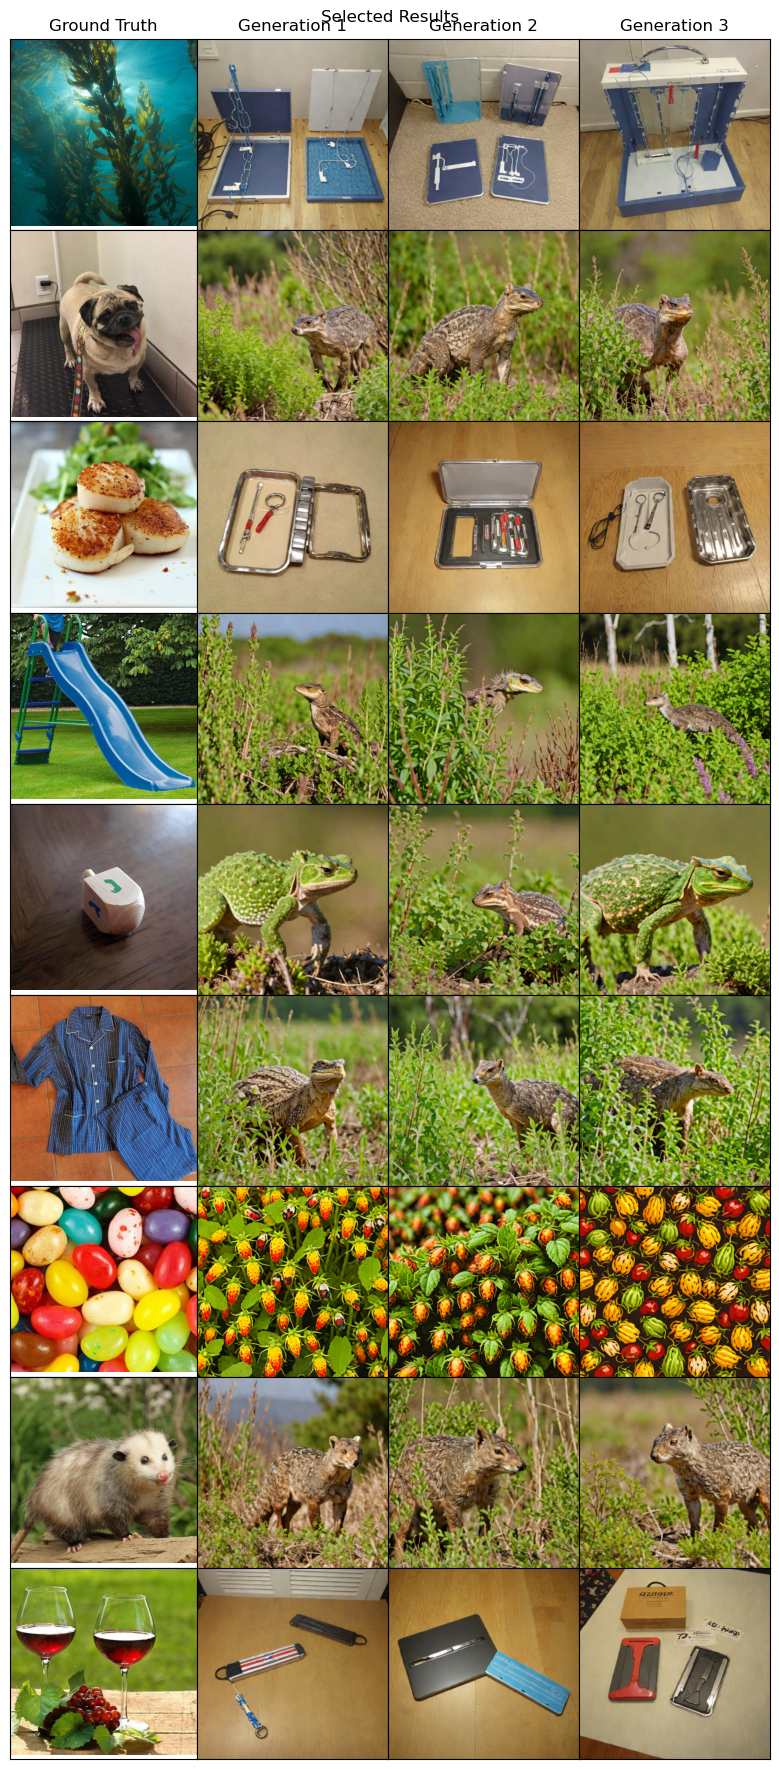

In [ ]:
from mpl_toolkits.axes_grid1 import ImageGrid
import matplotlib.pyplot as plt
import PIL

fig = plt.figure(figsize=(8., 18.))
fig.suptitle("Selected Results")
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(9, 4),  # creates 2x2 grid of Axes
                 axes_pad=0,  # pad between Axes in inch.
                
                )

for i_row in range(9):
    grid_offset = 4*i_row
    concept_name = selected_figures[i_row]
    concept_results = selected_results[concept_name]
    gt_path = next(concept_results["gt"].iterdir())
    gt = PIL.Image.open(gt_path)
    ax = grid[grid_offset] 
    ax.imshow(gt)
    ax.set_xticks([])
    ax.set_yticks([])
    if i_row == 0:
        ax.set_title("Ground Truth")

    for i_col, gen_path in enumerate(concept_results["gen"].iterdir(), start=1):
        gen = PIL.Image.open(gen_path)
        ax = grid[grid_offset + i_col] 
        ax.imshow(gen)
        ax.set_xticks([])
        ax.set_yticks([])
        if i_row == 0:
            ax.set_title(f"Generation {i_col}")

plt.tight_layout()

In [ ]:
from pathlib import Path
import numpy as np

all_names = ([p.name for p in list(gen_dir.iterdir())])
choosable_names = list(set(all_names) - set(selected_figures.values()))
np.random.seed(42)
random_idxs = np.random.choice(200, size=10, replace=False)
chosen_names = np.array(choosable_names)[random_idxs]

random_results = {}

for concept_name in chosen_names:
    gt_results = list(gt_dir.glob(f"*_{concept_name}"))
    assert len(gt_results) == 1

    gen_results = list(gen_dir.glob(f"{concept_name}"))
    assert len(gen_results) == 1

    random_results[concept_name] = {"gt": gt_results[0], "gen": gen_results[0]}

random_results

{'omelet': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00123_omelet'),
  'gen': PosixPath('Generation/generated_imgs/sub-08/omelet')},
 'bonnet': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00019_bonnet'),
  'gen': PosixPath('Generation/generated_imgs/sub-08/bonnet')},
 'face_mask': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00074_face_mask'),
  'gen': PosixPath('Generation/generated_imgs/sub-08/face_mask')},
 'hamburger': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00091_hamburger'),
  'gen': PosixPath('Generation/generated_imgs/sub-08/hamburger')},
 'fruit': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00081_fruit'),
  'gen': PosixPath('Generation/generated_imgs/sub-08/fruit')},
 'tick': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00183_tick'),
  'gen': PosixPath('Generation/generated_imgs/sub-08/tick')},
 'bun': {'gt': PosixPath('data/things-eeg2/images_set/test_images/00027_bun'),
  'gen': PosixPath

/tmp/ipykernel_61012/3466145308.py:31: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


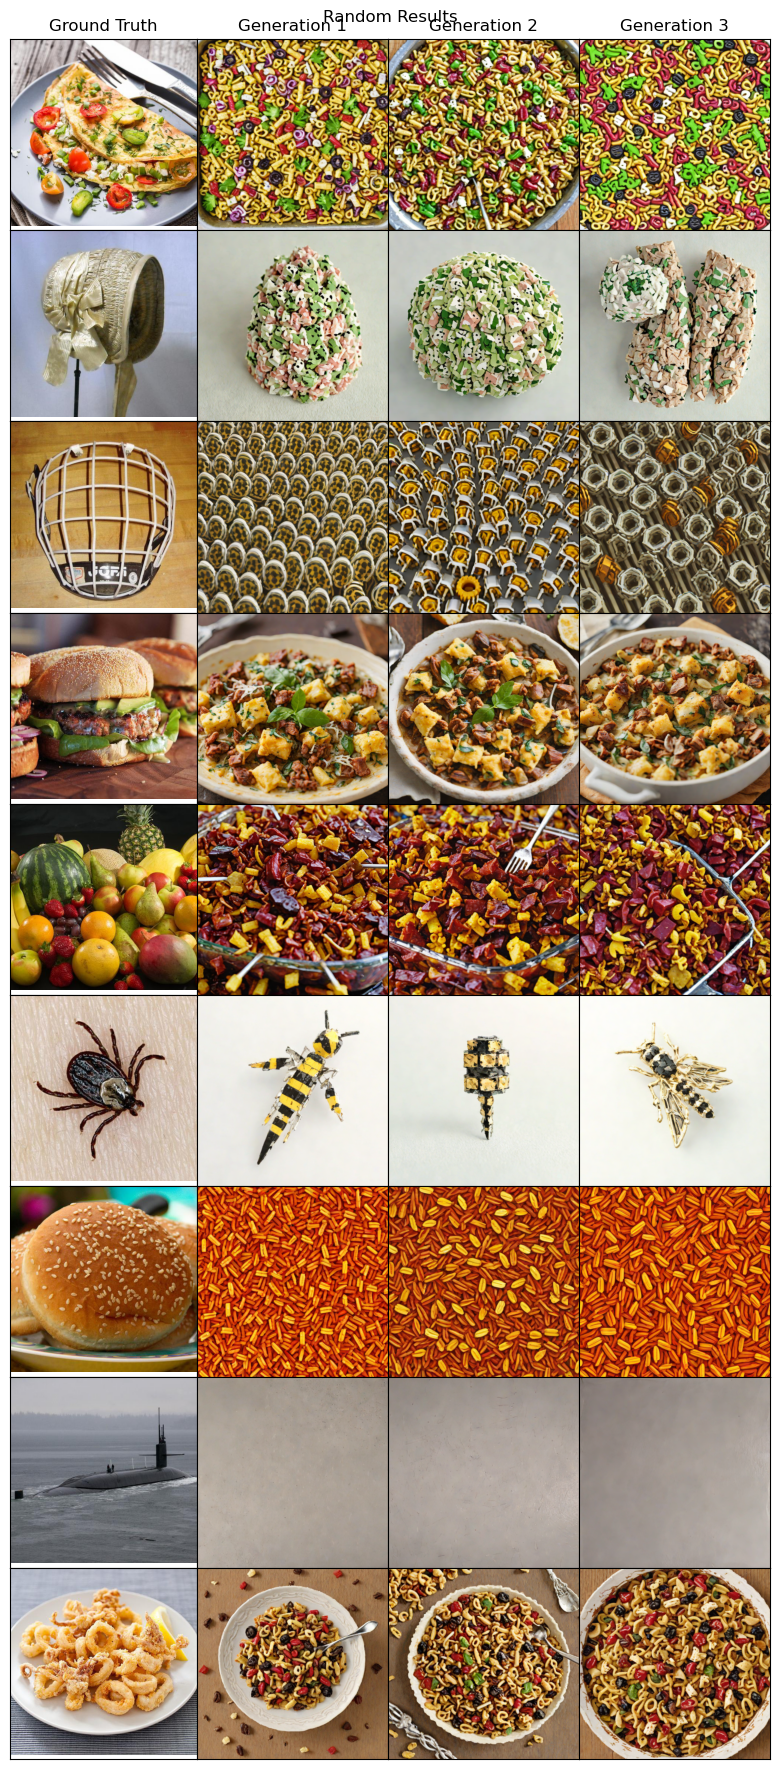

In [ ]:
fig = plt.figure(figsize=(8., 18.))
fig.suptitle("Random Results")
grid = ImageGrid(fig, 111,  # similar to subplot(111)
                 nrows_ncols=(9, 4),  # creates 2x2 grid of Axes
                 axes_pad=0,  # pad between Axes in inch.
                
                )

for i_row in range(9):
    grid_offset = 4*i_row
    concept_name = chosen_names[i_row]
    concept_results = random_results[concept_name]
    gt_path = next(concept_results["gt"].iterdir())
    gt = PIL.Image.open(gt_path)
    ax = grid[grid_offset] 
    ax.imshow(gt)
    ax.set_xticks([])
    ax.set_yticks([])
    if i_row == 0:
        ax.set_title("Ground Truth")

    for i_col, gen_path in enumerate(concept_results["gen"].iterdir(), start=1):
        gen = PIL.Image.open(gen_path)
        ax = grid[grid_offset + i_col] 
        ax.imshow(gen)
        ax.set_xticks([])
        ax.set_yticks([])
        if i_row == 0:
            ax.set_title(f"Generation {i_col}")

plt.tight_layout()